# 演習・Twitterのテキスト分類問題

実データを用いて機械学習を用いた分類問題を実践例として、Twitter投稿データの分類問題を考えます。

（ここでは、2020年に収集したデータを用います）


2019年時点で　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　政治家のうち最もフォロワー数がいる2人（橋下徹 @hashimoto_lo
安倍晋三 @AbeShinzo、[出典](https://meyou.jp/ranking/follower_politician)）のツイートをそれぞれどのユーザーの発信によるものか分類してみましょう。


In [1]:
import pandas as pd
import pickle
import numpy as np
from matplotlib import pyplot as plt
import japanize_matplotlib
%matplotlib inline
pd.set_option('display.max_columns', 100)

In [2]:
dfs = []
for user in ['hashimoto_lo','AbeShinzo']:
    with open('./data/tweets_{}.pkl'.format(user), 'rb') as f:
        tmp = pickle.load(f)
        dfs.append(tmp)

In [3]:
df = pd.concat(dfs)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5284 entries, 0 to 2067
Data columns (total 29 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   contributors               0 non-null      object 
 1   coordinates                0 non-null      object 
 2   created_at                 5284 non-null   object 
 3   entities                   5284 non-null   object 
 4   extended_entities          674 non-null    object 
 5   favorite_count             5284 non-null   int64  
 6   favorited                  5284 non-null   bool   
 7   geo                        0 non-null      object 
 8   id                         5284 non-null   int64  
 9   id_str                     5284 non-null   object 
 10  in_reply_to_screen_name    812 non-null    object 
 11  in_reply_to_status_id      810 non-null    float64
 12  in_reply_to_status_id_str  810 non-null    object 
 13  in_reply_to_user_id        812 non-null    float

In [5]:
df.head(5)

,contributors,coordinates,created_at,entities,extended_entities,favorite_count,favorited,geo,id,id_str,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,is_quote_status,lang,place,possibly_sensitive,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,text,truncated,user
0,None,None,Sun Aug 02 22:39:43 +0000 2020,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,399,False,None,1290054702210531329,1290054702210531329,None,NaN,None,NaN,None,False,ja,None,False,NaN,NaN,NaN,44,False,NaN,"<a href=""http://twitter.com/download/android"" ...",（スタッフよりお知らせ）本日13:55より生放送「情報ライブ ミヤネ屋」（読売テレビ）に、橋...,False,"{'id': 245677083, 'id_str': '245677083', 'name..."
1,None,None,Sat Aug 01 15:49:14 +0000 2020,"{'hashtags': [{'text': '日曜報道THEPRIME', 'indice...",NaN,0,False,None,1289589012785586176,1289589012785586176,None,NaN,None,NaN,None,False,ja,None,NaN,NaN,NaN,NaN,98,False,{'created_at': 'Sat Aug 01 15:14:22 +0000 2020...,"<a href=""http://twitter.com/download/iphone"" r...",RT @THEPRIME_CX: 今日の #日曜報道THEPRIME は...【感染列島８月...,False,"{'id': 245677083, 'id_str': '245677083', 'name..."
2,None,None,Sat Aug 01 13:45:07 +0000 2020,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,1693,False,None,1289557775266136064,1289557775266136064,hashimoto_lo,1.289558e+18,1289557773630414850,245677083.0,245677083,False,ja,None,NaN,NaN,NaN,NaN,189,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",評論家には政治はできません。ただうまくメッセージを出せない政治家も多いでしょう。政治に評論家...,False,"{'id': 245677083, 'id_str': '245677083', 'name..."
3,None,None,Sat Aug 01 13:45:06 +0000 2020,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,1341,False,None,1289557773630414850,1289557773630414850,None,NaN,None,NaN,None,True,ja,None,False,{'created_at': 'Sat Aug 01 07:14:22 +0000 2020...,1.289459e+18,1289459440555450369,131,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",それは党内の政治事情ですね。このような場合、僕が代表だったときには、有権者には「本来この特措...,True,"{'id': 245677083, 'id_str': '245677083', 'name..."
4,None,None,Sat Aug 01 12:00:34 +0000 2020,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,749,False,None,1289531464892088320,1289531464892088320,None,NaN,None,NaN,None,False,ja,None,False,NaN,NaN,NaN,67,False,NaN,"<a href=""https://abema.tv"" rel=""nofollow"">ABEM...",NewsBAR橋下、始まりました！（スタッフより） @ABEMA で視聴中 https://...,False,"{'id': 245677083, 'id_str': '245677083', 'name..."


In [6]:
df['user_name'] = df['user'].apply(lambda x: x['name'])

In [7]:
df = df.drop_duplicates(['id'])

In [8]:
df['user_screen_name'] = df['user'].apply(lambda x: x['screen_name'])

## 全期間におけるユーザー別ツイート数

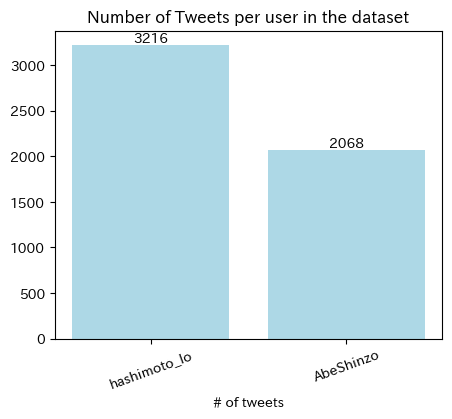

In [9]:
fig, ax = plt.subplots(1,1,figsize= (5,4))
N_tweets_users = pd.DataFrame(df['user_screen_name'].value_counts()).sort_values(by = 'user_screen_name', ascending=False)
plt.bar(N_tweets_users.index, N_tweets_users['user_screen_name'], color = 'lightblue')
for index, value in enumerate(N_tweets_users['user_screen_name']):
    plt.text(index, value+30, str(value), ha = 'center')
plt.title('Number of Tweets per user in the dataset')
plt.xlabel('# of tweets')
plt.xticks(rotation=20)
plt.show()

分析対象はRetweetでは無いオリジナルのTweetsのみとする

In [10]:
df = df[df['retweeted_status'].isnull()]

In [11]:
print(df.shape)

(4244, 31)


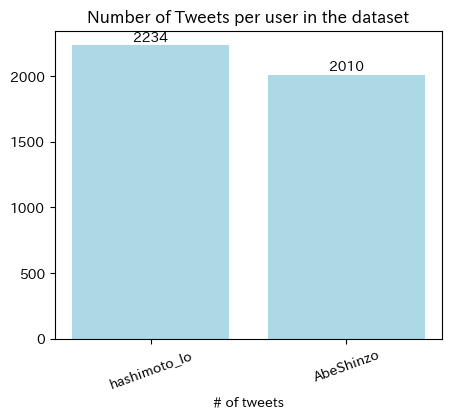

In [12]:
fig, ax = plt.subplots(1,1,figsize= (5,4))
N_tweets_users = pd.DataFrame(df['user_screen_name'].value_counts()).sort_values(by = 'user_screen_name', ascending=False)
plt.bar(N_tweets_users.index, N_tweets_users['user_screen_name'], color = 'lightblue')
for index, value in enumerate(N_tweets_users['user_screen_name']):
    plt.text(index, value+30, str(value), ha='center')
plt.title('Number of Tweets per user in the dataset')
plt.xlabel('# of tweets')
plt.xticks(rotation=20)
plt.show()

## 年別のツイート数

In [13]:
df['created_at'] = pd.to_datetime(df['created_at'])
df['date'] = df['created_at'].dt.date
df['year'] = df['created_at'].dt.year
df['time'] = df['created_at'].dt.time

In [14]:
df.head(1)

,contributors,coordinates,created_at,entities,extended_entities,favorite_count,favorited,geo,id,id_str,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,is_quote_status,lang,place,possibly_sensitive,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,text,truncated,user,user_name,user_screen_name,date,year,time
0,None,None,2020-08-02 22:39:43+00:00,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,399,False,None,1290054702210531329,1290054702210531329,None,NaN,None,NaN,None,False,ja,None,False,NaN,NaN,NaN,44,False,NaN,"<a href=""http://twitter.com/download/android"" ...",（スタッフよりお知らせ）本日13:55より生放送「情報ライブ ミヤネ屋」（読売テレビ）に、橋...,False,"{'id': 245677083, 'id_str': '245677083', 'name...",橋下徹,hashimoto_lo,2020-08-02,2020,22:39:43


In [15]:
pd.crosstab(df['user_name'],df['year'])

year,2012,2013,2014,2015,2016,2017,2018,2019,2020
user_name,,,,,,,,,
安倍晋三,336,315,318,168,62,73,247,288,203
橋下徹,0,0,0,0,0,0,21,1212,1001


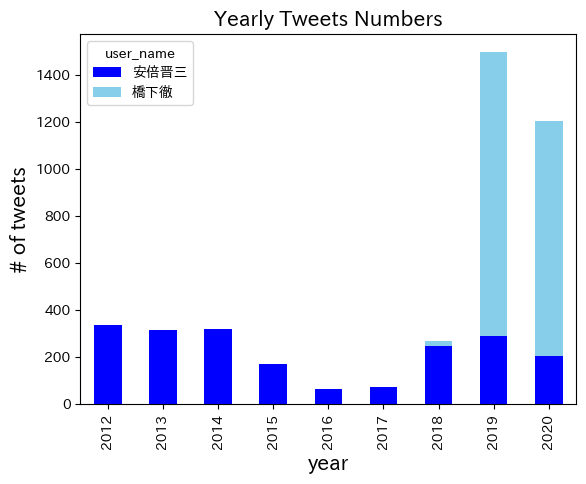

In [16]:
pd.crosstab(df['user_name'],df['year']).T.plot.bar(stacked=True, color=['blue','skyblue'])
plt.title('Yearly Tweets Numbers', fontsize=15)
plt.xlabel('year', fontsize=15)
plt.ylabel('# of tweets', fontsize=15)
plt.show()

## ユーザー別のLikesのヒストグラム

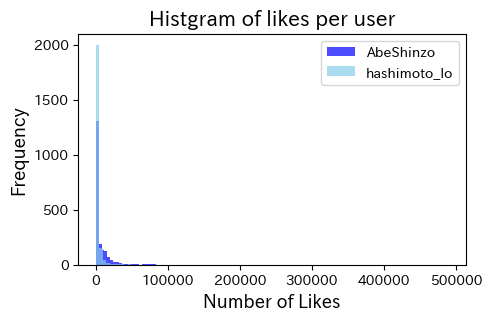

In [17]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,1, figsize=(5,3))

for i, arr in enumerate(df.groupby(['user_screen_name'])['favorite_count']):
    ax.hist(arr[1], bins = 100, 
            color=['blue','skyblue'][i], alpha = .7, label = arr[0])
plt.legend()
plt.title('Histgram of likes per user', fontsize=15)
plt.ylabel('Frequency', fontsize=13)
plt.xlabel('Number of Likes', fontsize=13)
plt.show()

上の図では少しわかりにくいので、対数変換値をプロット

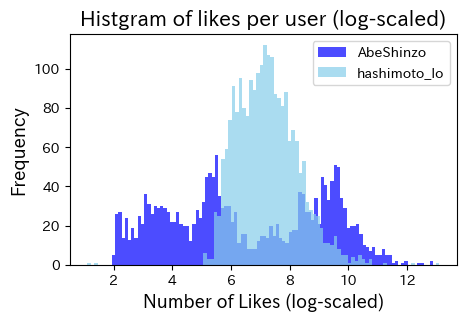

In [18]:
fig, ax = plt.subplots(1,1, figsize=(5,3))
for i, arr in enumerate(df.groupby(['user_screen_name'])['favorite_count']):
    ax.hist(arr[1].apply(lambda x: np.log(1+x)), bins = 100, 
            color=['blue','skyblue'][i], alpha = .7, label = arr[0])
plt.legend()
plt.title('Histgram of likes per user (log-scaled)', fontsize=15)
plt.ylabel('Frequency', fontsize=13)
plt.xlabel('Number of Likes (log-scaled)', fontsize=13)
plt.show()

## ユーザー別のRetweetされた数のヒストグラム

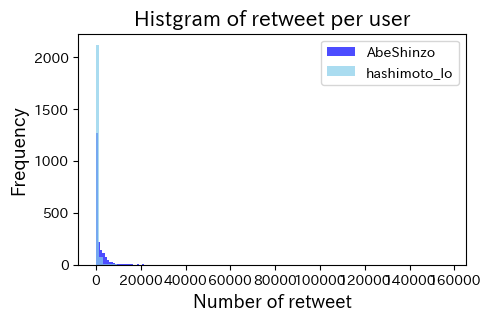

In [19]:
fig, ax = plt.subplots(1,1, figsize=(5,3))

for i, arr in enumerate(df.groupby(['user_screen_name'])['retweet_count']):
    ax.hist(arr[1], bins = 100, 
            color=['blue','skyblue'][i], alpha = .7, label = arr[0])
plt.legend()
plt.title('Histgram of retweet per user', fontsize=15)
plt.ylabel('Frequency', fontsize=13)
plt.xlabel('Number of retweet', fontsize=13)
plt.show()

上の図では少しわかりにくいので、対数変換値をプロット

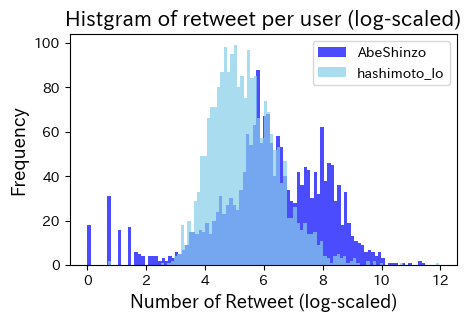

In [20]:
fig, ax = plt.subplots(1,1, figsize=(5,3))
for i, arr in enumerate(df.groupby(['user_screen_name'])['retweet_count']):
    ax.hist(arr[1].apply(lambda x: np.log(1+x)), bins = 100, 
            color=['blue','skyblue'][i], alpha = .7, label = arr[0])
plt.legend()
plt.title('Histgram of retweet per user (log-scaled)', fontsize=15)
plt.ylabel('Frequency', fontsize=13)
plt.xlabel('Number of Retweet (log-scaled)', fontsize=13)
plt.show()

## 日本語の正規化（表記ゆれの是正）と形態素解析を行う

### 正規化
1. 正規化を自動で実施してくれるパッケージをインストール。Terminal or Anaconda Prompt で　`pip install neologdn`
2. `import nelogdn` `neologdn.normalize()` で正規化　

3. Regular ExpressionでテキストからURLを除外する

### 形態素解析
mac の場合
1. Homebrewをインストール Terminal で `/bin/bash -c "$(curl -fsSL https://raw.githubusercontent.com/Homebrew/install/master/install.sh)"`とうつ
2. `brew install mecab` `brew install mecab-ipadic`
3. `git clone --depth 1 https://github.com/neologd/mecab-ipadic-neologd.git` 
4. `cd ./mecab-ipadic-neologd`
5. `./bin/install-mecab-ipadic-neologd -n`

6. `pip install mecab-python3`

In [21]:
import neologdn
import re
import MeCab
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
import sklearn as sk
from sklearn.neural_network import MLPClassifier
from sklearn.decomposition import PCA
from sklearn.cluster import MiniBatchKMeans
import itertools, random


正規化

In [22]:
df.loc[:,'standarized_text'] = df['text'].apply(lambda x: neologdn.normalize(x))

In [23]:
pat = re.compile(r'https?://\S+')
df.loc[:, 'standarized_text'] = df['standarized_text'].apply(lambda x: re.sub(pat, '', x))

In [24]:
neologd_tagger = MeCab.Tagger('-Ochasen -d /opt/homebrew/lib/mecab/dic/mecab-ipadic-neologd')
print(neologd_tagger.parse('庭には二羽鶏がいる'))

庭	ニワ	庭	名詞-一般		
に	ニ	に	助詞-格助詞-一般		
は	ハ	は	助詞-係助詞		
二羽	ニワ	二羽	名詞-固有名詞-人名-姓		
鶏	ニワトリ	鶏	名詞-一般		
が	ガ	が	助詞-格助詞-一般		
いる	イル	いる	動詞-自立	一段	基本形
EOS



In [25]:
def make_words_list(cell):
    import re
    pat = re.compile('━|\-|\.|\,|[━!-)+,-\./:-@[-`{-~]|^[0-9０-９]+$|^\*$|http|www|html|jp|com|^[a-zA-Z]+$|する|こと|いる|ます')

    a = cell[-3]
    b = cell[1]

    if a == '*': pass

    elif b in ('名詞','形容詞'): #'動詞',,'感動詞'
        if pat.match(a) !=None: pass
        else:
            return a

    else:pass

def tokenize(cell):
    tokens = []
    neologd_tagger.parse('')  
    node = neologd_tagger.parseToNode(str(cell))
    while node:
        tokens.append([node.surface, *node.feature.split(',')])
        node = node.next

    list_words = [x for x in list(map(make_words_list, tokens)) if x is not None]

    return list_words

In [26]:
# Tf-idfを用いる場合
# vectorizer = TfidfVectorizer(analyzer=tokenize)
vectorizer = CountVectorizer(analyzer=tokenize,min_df=20,max_df=.9)
text = vectorizer.fit_transform(df['standarized_text'])

In [27]:
text.shape, df[['user_screen_name']].values.shape

((4244, 555), (4244, 1))

In [28]:
X = pd.DataFrame(text.toarray(), index= df['user_screen_name'],columns = vectorizer.get_feature_names_out())
# もし`get_feature_names_out`でエラーが出たら次のラインで試してください。
# X = pd.DataFrame(text.toarray(), index= df['user_screen_name'],columns = vectorizer.get_feature_names())
X.sample(2)

,12時,30分,G20,Yahoo!ニュース,あと,いい,うち,おかしい,お昼,お知らせ,お祈り,お見舞い,お金,お願い,ここ,こちら,これ,ご覧,さ,さん,すべて,そう,そこ,そのため,その後,それ,たくさん,たち,ため,とき,ところ,ない,の,はじめ,はず,まま,みなさま,もと,もの,やり方,よい,よう,わけ,ん,アップ,イベント,インタビュー,インテリ,インフルエンザ,ウィル,...,訪問,評価,話,認識,説明,誰,課題,調査,論,警察,議員,議論,負担,責任,貴殿,費,賛成,軽症,連中,連携,違い,選択,選挙,避難,邦人,都,重症,重要,野党,金,開催,間,間違い,関係,関西,関西テレビ,限り,陛下,際,雇用調整助成金,雑誌,靖国,非常,韓国,頃,首相,首相官邸,首脳,首脳会談,高い
user_screen_name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
hashimoto_lo,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
AbeShinzo,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [29]:
cat = pd.Categorical(df['user_screen_name'])
y = cat.codes
print(cat.categories)
y

Index(['AbeShinzo', 'hashimoto_lo'], dtype='object')


array([1, 1, 1, ..., 0, 0, 0], dtype=int8)

In [30]:
X.shape, df.shape

((4244, 555), (4244, 35))

In [31]:
df = df[['created_at','user_name', 'user_screen_name', 'favorite_count','retweet_count',
    'retweeted_status','text','standarized_text','extended_entities']].reset_index(drop=True).merge(X.reset_index(drop=True),
                                left_index=True, right_index=True)

In [32]:
df.head(2)

,created_at,user_name,user_screen_name,favorite_count,retweet_count,retweeted_status,text,standarized_text,extended_entities,12時,30分,G20,Yahoo!ニュース,あと,いい,うち,おかしい,お昼,お知らせ,お祈り,お見舞い,お金,お願い,ここ,こちら,これ,ご覧,さ,さん,すべて,そう,そこ,そのため,その後,それ,たくさん,たち,ため,とき,ところ,ない,の,はじめ,はず,まま,みなさま,もと,もの,やり方,よい,...,訪問,評価,話,認識,説明,誰,課題,調査,論,警察,議員,議論,負担,責任,貴殿,費,賛成,軽症,連中,連携,違い,選択,選挙,避難,邦人,都,重症,重要,野党,金,開催,間,間違い,関係,関西,関西テレビ,限り,陛下,際,雇用調整助成金,雑誌,靖国,非常,韓国,頃,首相,首相官邸,首脳,首脳会談,高い
0,2020-08-02 22:39:43+00:00,橋下徹,hashimoto_lo,399,44,NaN,（スタッフよりお知らせ）本日13:55より生放送「情報ライブ ミヤネ屋」（読売テレビ）に、橋...,(スタッフよりお知らせ)本日13:55より生放送「情報ライブミヤネ屋」(読売テレビ)に、橋下...,NaN,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2020-08-01 13:45:07+00:00,橋下徹,hashimoto_lo,1693,189,NaN,評論家には政治はできません。ただうまくメッセージを出せない政治家も多いでしょう。政治に評論家...,評論家には政治はできません。ただうまくメッセージを出せない政治家も多いでしょう。政治に評論家...,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### 訓練データと検証データを生成する

In [33]:
# Split our data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

#### Logistic Regression

In [34]:
clf = LogisticRegression(random_state=0).fit(X_train, y_train)
y_pred = clf.predict(X_test)

#### Modelの精度

In [35]:
print(classification_report(y_test, y_pred, target_names=cat.categories))

              precision    recall  f1-score   support

   AbeShinzo       0.90      0.98      0.94       486
hashimoto_lo       0.98      0.91      0.94       575

    accuracy                           0.94      1061
   macro avg       0.94      0.94      0.94      1061
weighted avg       0.94      0.94      0.94      1061



#### Confusion Matirx

In [36]:
print(metrics.confusion_matrix(y_test, y_pred))

[[474  12]
 [ 51 524]]


In [37]:
pd.DataFrame(metrics.confusion_matrix(y_test, y_pred), columns = cat.categories,
             index = cat.categories)

,AbeShinzo,hashimoto_lo
AbeShinzo,474,12
hashimoto_lo,51,524


#### ROC Curve

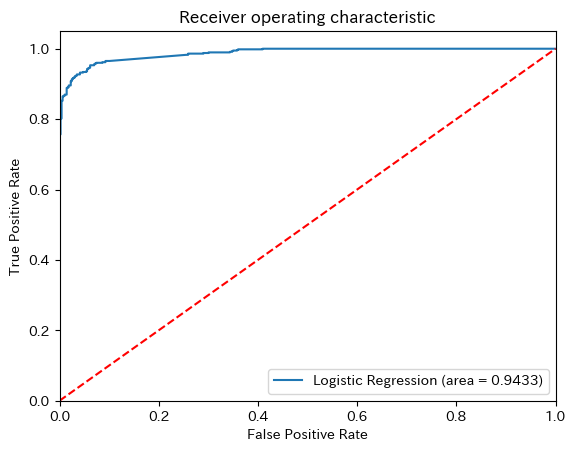

In [38]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.4f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

### 2. Naive Bayse (Support Vector Machines)

In [39]:
from sklearn.naive_bayes import BernoulliNB
nb = BernoulliNB().fit(X_train, y_train)
y_pred = nb.predict(X_test)

#### Modelの精度

In [40]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, target_names=cat.categories))

              precision    recall  f1-score   support

   AbeShinzo       0.90      0.97      0.94       486
hashimoto_lo       0.97      0.91      0.94       575

    accuracy                           0.94      1061
   macro avg       0.94      0.94      0.94      1061
weighted avg       0.94      0.94      0.94      1061



#### Confusion Matirx

In [41]:
print(metrics.confusion_matrix(y_test, y_pred))

[[472  14]
 [ 50 525]]


In [42]:
pd.DataFrame(metrics.confusion_matrix(y_test, y_pred), columns = cat.categories,
             index = cat.categories)

,AbeShinzo,hashimoto_lo
AbeShinzo,472,14
hashimoto_lo,50,525


#### ROC Curve

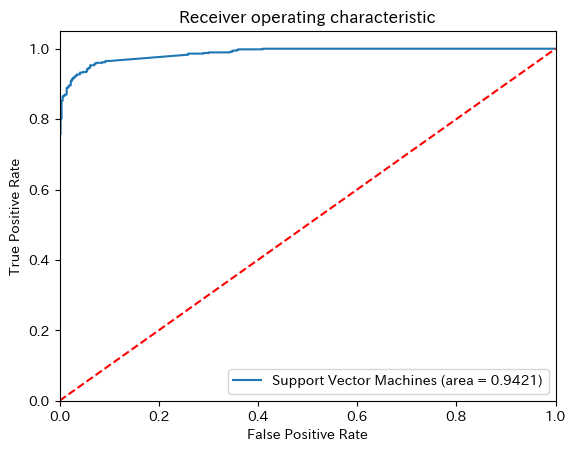

In [43]:

logit_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Support Vector Machines (area = %0.4f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

### 3. SVM (Support Vector Machines)

In [44]:
svm = svm.SVC(random_state=0).fit(X_train, y_train)
y_pred = svm.predict(X_test)

#### Modelの精度

In [45]:
print(classification_report(y_test, y_pred, target_names=cat.categories))

              precision    recall  f1-score   support

   AbeShinzo       0.90      0.96      0.93       486
hashimoto_lo       0.96      0.91      0.93       575

    accuracy                           0.93      1061
   macro avg       0.93      0.93      0.93      1061
weighted avg       0.93      0.93      0.93      1061



#### Confusion Matirx

In [46]:
print(metrics.confusion_matrix(y_test, y_pred))

[[465  21]
 [ 53 522]]


In [47]:
pd.DataFrame(metrics.confusion_matrix(y_test, y_pred), columns = cat.categories,
             index = cat.categories)

,AbeShinzo,hashimoto_lo
AbeShinzo,465,21
hashimoto_lo,53,522


#### ROC Curve

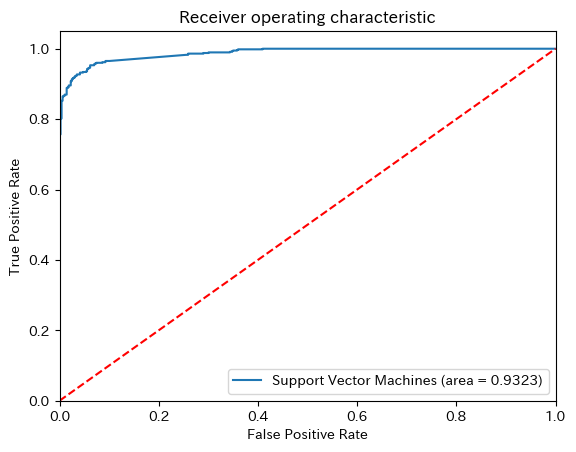

In [48]:

logit_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Support Vector Machines (area = %0.4f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

### 4. Random Forest

In [49]:
rf = RandomForestClassifier(random_state=0).fit(X_train, y_train)
y_pred = rf.predict(X_test)

#### Modelの精度

In [50]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, target_names=cat.categories))

              precision    recall  f1-score   support

   AbeShinzo       0.92      0.93      0.92       486
hashimoto_lo       0.94      0.93      0.94       575

    accuracy                           0.93      1061
   macro avg       0.93      0.93      0.93      1061
weighted avg       0.93      0.93      0.93      1061



#### Confusion Matirx

In [51]:
from sklearn import metrics
print(metrics.confusion_matrix(y_test, y_pred))

[[453  33]
 [ 41 534]]


In [52]:
pd.DataFrame(metrics.confusion_matrix(y_test, y_pred), columns = cat.categories,
             index = cat.categories)

,AbeShinzo,hashimoto_lo
AbeShinzo,453,33
hashimoto_lo,41,534


#### ROC Curve

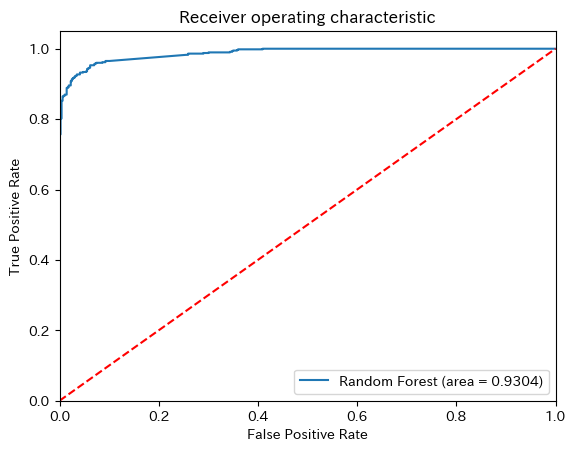

In [53]:
logit_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Random Forest (area = %0.4f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

#### 5. Neural Netowrk

一般的にはsklearnではなくて、TensorflowやKerasを用いて実装することが多いのですが、ここではsklearnで実行します。

In [54]:
nn = MLPClassifier(random_state=0, max_iter=300, hidden_layer_sizes= 50).fit(X_train, y_train)
y_pred = nn.predict(X_test)

#### Modelの精度

In [55]:
print(classification_report(y_test, y_pred, target_names=cat.categories))

              precision    recall  f1-score   support

   AbeShinzo       0.92      0.96      0.94       486
hashimoto_lo       0.97      0.93      0.95       575

    accuracy                           0.94      1061
   macro avg       0.94      0.95      0.94      1061
weighted avg       0.95      0.94      0.94      1061



#### Confusion Matirx

In [56]:
print(metrics.confusion_matrix(y_test, y_pred))

[[468  18]
 [ 41 534]]


In [57]:
pd.DataFrame(metrics.confusion_matrix(y_test, y_pred), columns = cat.categories,
             index = cat.categories)

,AbeShinzo,hashimoto_lo
AbeShinzo,468,18
hashimoto_lo,41,534


#### ROC Curve

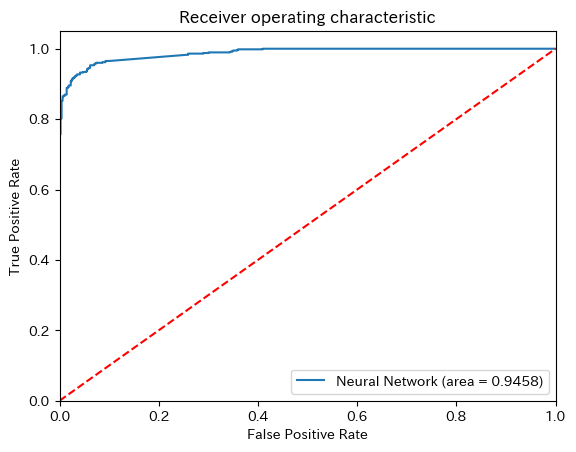

In [58]:

logit_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Neural Network (area = %0.4f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

## PCAによる次元圧縮

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [60]:
X_train.shape

(3183, 555)

In [61]:
# 標準化
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# 平均と分散を計算
scaler.fit(X_train)
X_train_s = scaler.transform(X_train)
X_test_s  = scaler.transform(X_test)

In [62]:
pca = PCA(n_components=300)
pca.fit(X)
Xpca = pca.transform(X)
X_train = pca.transform(X_train_s)
X_test = pca.transform(X_test_s)

/Users/yuyashibu/anaconda3/envs/iiimethodsiv/lib/python3.8/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(
/Users/yuyashibu/anaconda3/envs/iiimethodsiv/lib/python3.8/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


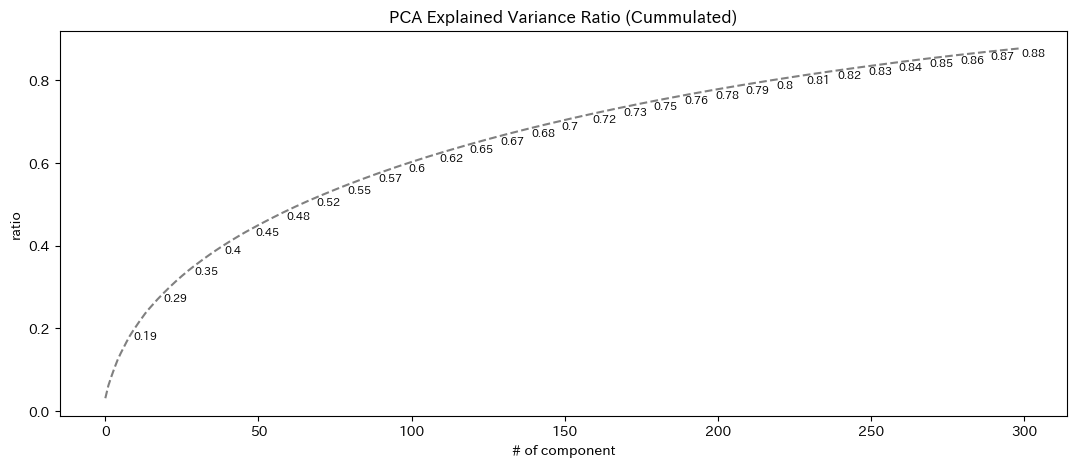

In [63]:
plt.figure(figsize=(13,5))
plt.plot(pca.explained_variance_ratio_.cumsum(),'--', color = 'grey')
for i, ratio in enumerate(pca.explained_variance_ratio_.cumsum()):
    if (i+1) % 10 ==0:
        plt.text(i, ratio-0.02, round(ratio,2), fontsize=8)
plt.title('PCA Explained Variance Ratio (Cummulated)')
plt.xlabel('# of component')
plt.ylabel('ratio')
plt.show()

/var/folders/x2/7ss5kcb12n1gtlpc8p2mtjtw0000gn/T/ipykernel_22836/2017848199.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=plt.cm.get_cmap('PiYG', 2))


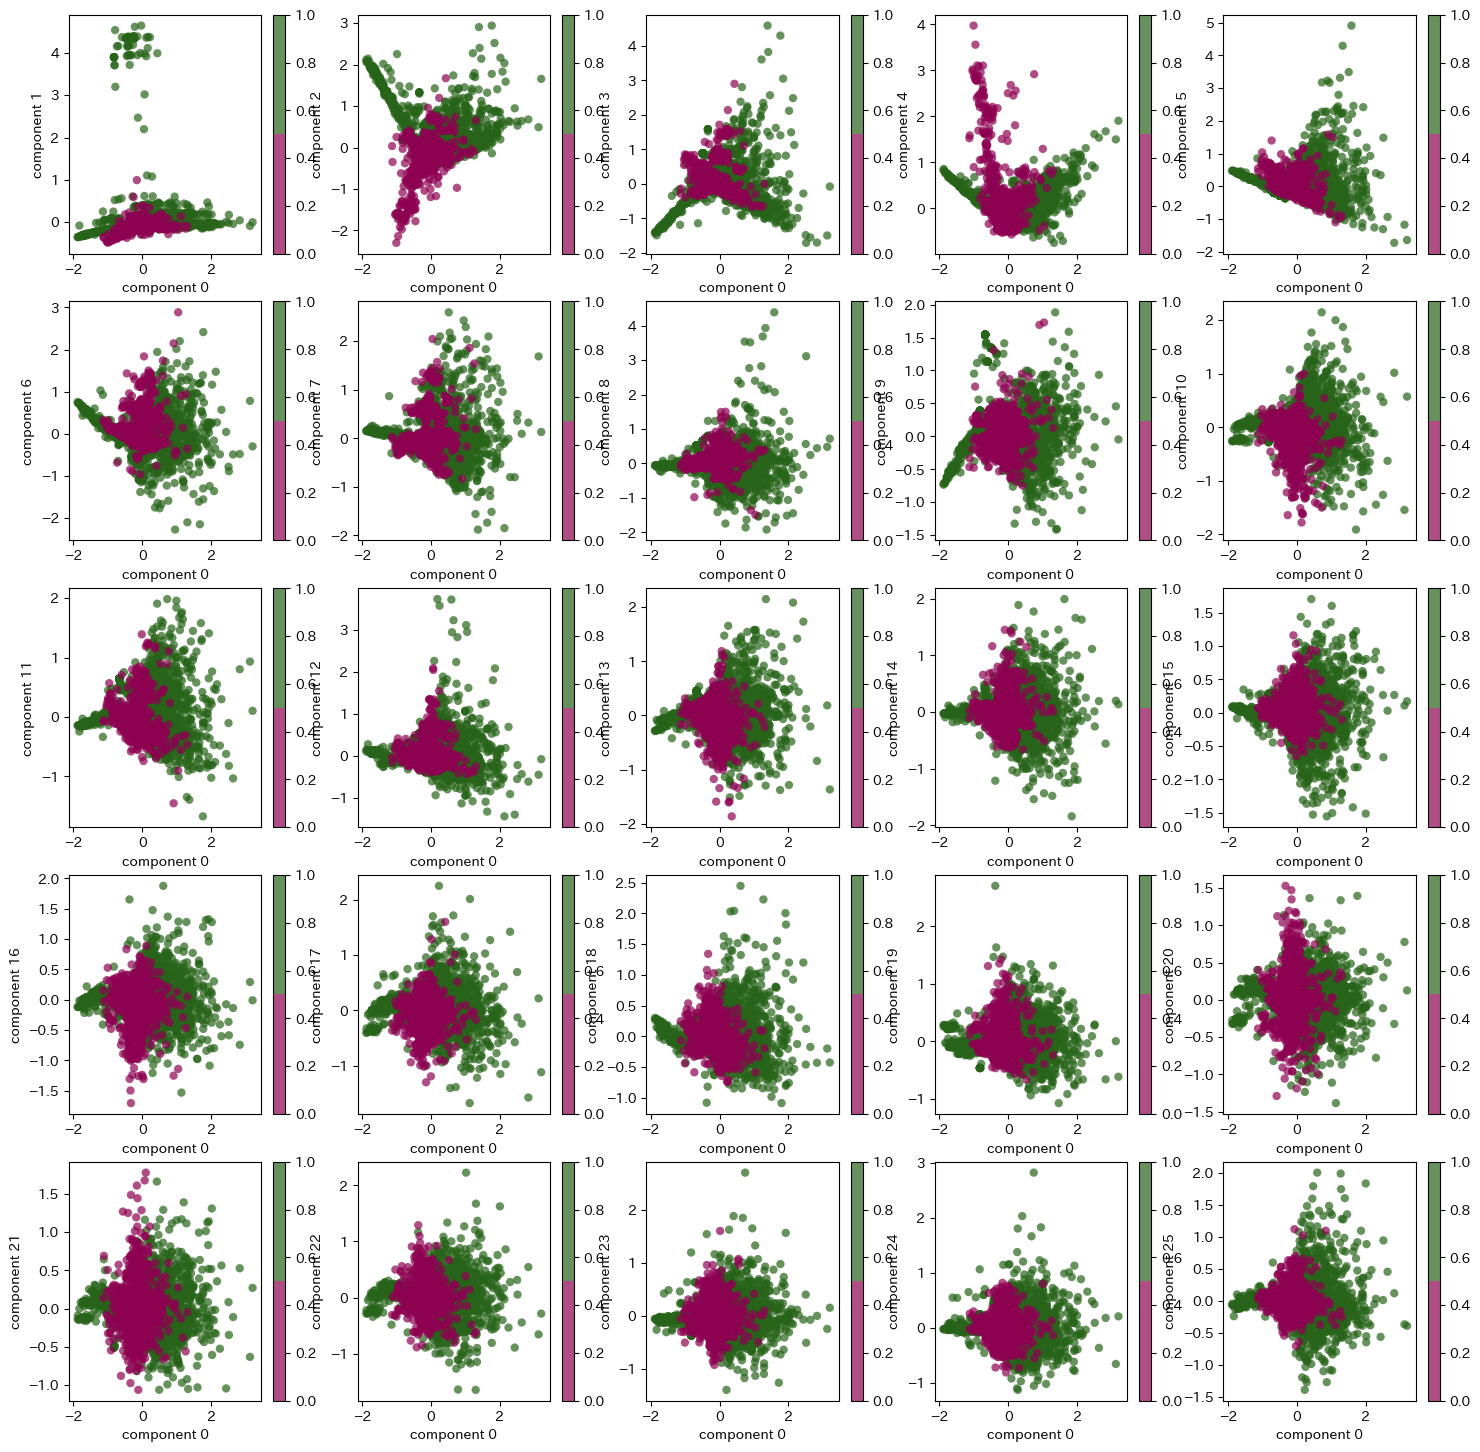

In [64]:
fig, ax = plt.subplots(5,5, figsize = (18,18))
for i, combination in enumerate(list(itertools.combinations(range(len(pca.components_)), 2))[:25]):
    c = i // 5
    i = i - 5*c
    s1 = ax[c, i].scatter(Xpca[:, combination[0]], Xpca[:, combination[1]],
                c=cat.codes, 
                edgecolor='none', alpha=0.7,
                cmap=plt.cm.get_cmap('PiYG', 2))
    ax[c, i].set_xlabel('component {}'.format(combination[0]))
    ax[c, i].set_ylabel('component {}'.format(combination[1]))
    plt.colorbar(s1, ax = ax[c, i])
plt.show()

In [65]:
# logistic regression
lg = LogisticRegression(random_state=0).fit(X_train, y_train)
lg_y_pred = lg.predict(X_test)
# Naive Bayse
nb = BernoulliNB().fit(X_train, y_train)
nb_y_pred = nb.predict(X_test)
# Random Forest
rf = RandomForestClassifier(random_state=0).fit(X_train, y_train)
rf_y_pred = rf.predict(X_test)
# Neural Network
nf = MLPClassifier(random_state=0).fit(X_train, y_train)
nf_y_pred = nf.predict(X_test)

In [66]:
print(metrics.accuracy_score(y_test, lg_y_pred))
print(metrics.accuracy_score(y_test, nb_y_pred))
print(metrics.accuracy_score(y_test, rf_y_pred))
print(metrics.accuracy_score(y_test, nf_y_pred))

0.9302544769085768
0.7389255419415646
0.9274269557021678
0.941564561734213


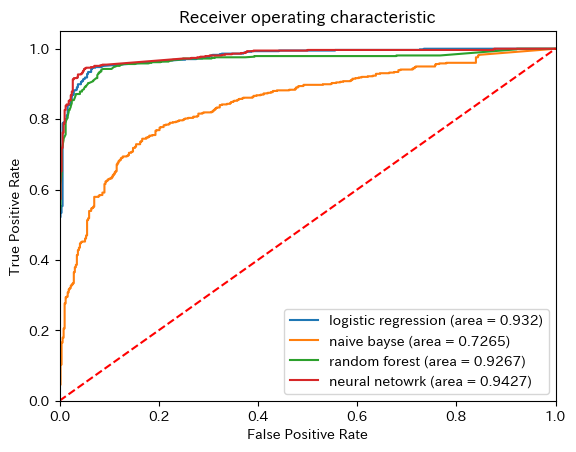

In [67]:
plt.figure()
names = ['logistic regression','naive bayse', 'random forest', 'neural netowrk']
for i, tmp in enumerate(zip([lg_y_pred, nb_y_pred, rf_y_pred, nf_y_pred],[lg,nb,rf,nf])):
    roc_auc = roc_auc_score(y_test, tmp[0])
    fpr, tpr, thresholds = roc_curve(y_test, tmp[1].predict_proba(X_test)[:,1])
    plt.plot(fpr, tpr, label='{} (area = {})'.format(names[i], round(roc_auc, 4)))
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

## どのようなトピックがあるか単語共起ネットワークを描く

In [68]:
import networkx as nx

アカウントごとに、単語の共起関係を示す共起行列を作ります

In [69]:
df_hashimoto = df[df['user_screen_name']=='hashimoto_lo']
df_abe = df[df['user_screen_name']=='AbeShinzo']

In [70]:
count_model = CountVectorizer(analyzer=tokenize, ngram_range=(1,1), min_df=0.03, max_df=.95) 
X_a = count_model.fit_transform(df_abe['standarized_text'])
X_a[X_a > 0] = 1 
Xc_a = (X_a.T * X_a)
Xc_a.setdiag(0) 
wordword_a = pd.DataFrame(Xc_a.todense(), index = count_model.get_feature_names_out(),columns = count_model.get_feature_names_out())
wordword_a.shape

(43, 43)

In [71]:
# `min_df`で指定した値より少ない出現回数の単語は除外します。
# `max_df`で指定した値より多い出現回数の単語は除外します。[0, 1]の間の値で割合での指定もできます。
count_model = CountVectorizer(analyzer=tokenize, ngram_range=(1,1), min_df=0.04, max_df=.95) 
X_h = count_model.fit_transform(df_hashimoto['standarized_text'])
X_h[X_h > 0] = 1 
Xc_h = (X_h.T * X_h)
Xc_h.setdiag(0) 
wordword_h = pd.DataFrame(Xc_h.todense(), index = count_model.get_feature_names_out(),columns = count_model.get_feature_names_out())
wordword_h.shape

(42, 42)

In [72]:
# create network
G_h = nx.from_pandas_adjacency(wordword_h)
G_a = nx.from_pandas_adjacency(wordword_a)

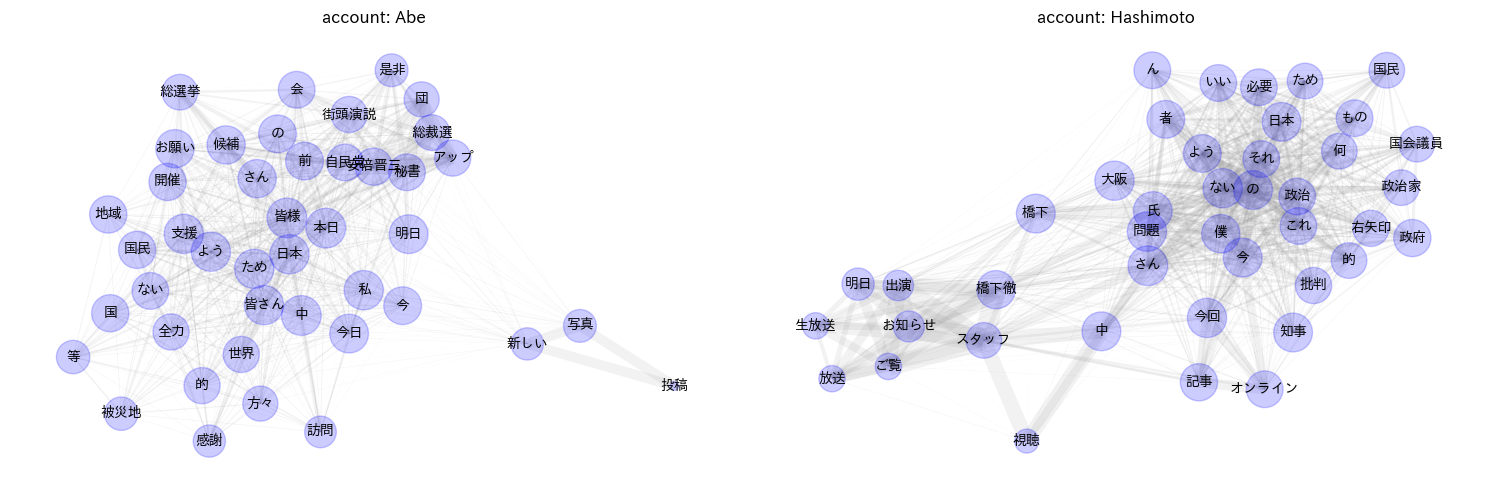

In [73]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
for i in range(2):
    ax = axs[i]
    G = [G_a, G_h][i]
    # Position nodes using Fruchterman-Reingold force-directed algorithm.
    # https://networkx.org/documentation/stable/reference/generated/networkx.drawing.layout.spring_layout.html
    pos = nx.spring_layout(G, seed=999)
    d = dict(G.degree)
    weights = [G[u][v]['weight']*0.1 for u,v in G.edges()]
    nx.draw_networkx_nodes(G, pos, ax=ax, node_color='blue', node_size=[v * 20 for v in d.values()], alpha = 0.2)
    nx.draw_networkx_edges(G, pos, ax=ax, alpha=0.1, width=list(weights), edge_color = 'grey')
    nx.draw_networkx_labels(G, pos, ax=ax, font_family='IPAexGothic', font_size=10)
    ax.set_title('account: {}'.format(['Abe', 'Hashimoto'][i]))
    ax.axis('off')
plt.tight_layout()
plt.show()

Abe


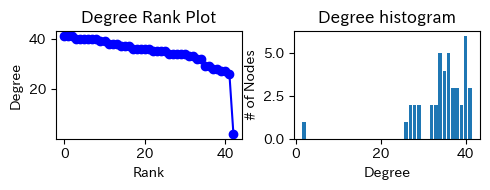

Hashimoto


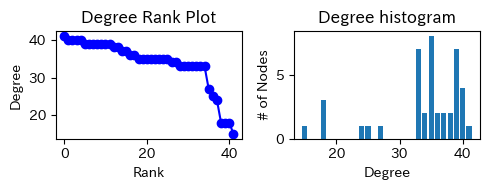

In [74]:
for c, G in enumerate([G_a, G_h]):
    print(['Abe','Hashimoto'][c])
    degree_sequence = sorted((d for n, d in G.degree()), reverse=True)
    dmax = max(degree_sequence)
    fig, axs = plt.subplots(1, 2, figsize=(5, 2))
    ax = axs[0]
    ax.plot(degree_sequence, "b-", marker="o")
    ax.set_title("Degree Rank Plot")
    ax.set_ylabel("Degree")
    ax.set_xlabel("Rank")

    ax = axs[1]
    ax.bar(*np.unique(degree_sequence, return_counts=True))
    ax.set_title("Degree histogram")
    ax.set_xlabel("Degree")
    ax.set_ylabel("# of Nodes")
    plt.tight_layout()
    plt.show()

## `netwulf`を用いた可視化

`pip install netwulf`で`netwulf`パッケージをインストールをしてください。

In [75]:
from netwulf import visualize
# 次のラインのコメントアウトを外して実行すると、新しいブラウザのタブが開きます。
# そこでさまざまなパラメーターを変更できます
# stylized_network, config = visualize(G_a)

作図例

<img src="./network_abe.png" width =600px >